In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 


In [2]:
df = pd.read_csv('train_1')
df
df = df.drop(columns=['Date Deployed'])

In [20]:
#we split the data intro train and test
y = df['fail_7']
X = df.drop('fail_7', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 100)

In [4]:
X_train

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,charge_cycle_time_below_12,AVG_charging_rate,AVG_discharging_rate
7764,20738,85.750000,85.625000,56.666667,3.125000,355.314583,353.999583,15.845833,23.856250,4165.000000,18.000000,39.702083,True,-0.052000,-0.022778
28474,47583,79.954545,79.636364,15.636364,1.681818,349.770909,344.391818,18.134545,30.602273,4159.136364,13.000000,48.736818,False,0.363333,0.085000
16894,36560,103.619048,103.571429,30.380952,3.190476,357.507143,356.609524,11.570952,16.674286,4163.142857,38.444444,28.245238,True,-0.002667,0.000556
29020,33967,104.000000,104.157895,1.263158,2.842105,350.693158,350.783158,15.156842,24.923158,4155.315789,7.692308,40.080000,True,-0.060667,-0.217778
1167,27802,104.833333,104.777778,98.111111,1.833333,355.868333,353.388889,11.968889,18.448889,4161.111111,11.666667,30.417778,True,0.021333,0.002778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,39876,90.411765,90.235294,10.588235,1.941176,334.852941,330.542353,16.024118,23.822941,4156.117647,4.666667,39.847059,False,-0.120000,-0.351111
5695,31257,82.125000,82.000000,10.187500,1.375000,356.201875,350.728750,19.163125,32.151250,4160.312500,13.300000,51.314375,True,0.234000,0.503333
8006,24102,88.750000,88.562500,60.000000,6.937500,386.271250,381.040625,14.311875,20.857500,4183.625000,8.166667,35.169375,False,-0.176667,0.005000
17745,13104,113.904762,113.952381,21.761905,2.095238,364.507143,365.542381,12.205714,17.125238,4165.238095,20.777778,29.330952,True,0.349333,-2.240000


In [42]:
X_test


,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,charge_cycle_time_below_12,AVG_charging_rate,AVG_discharging_rate
16477,13452,84.666667,84.458333,8.375000,1.208333,339.917500,334.291250,17.837083,28.040833,4152.000000,149.083333,45.877917,False,0.138000,0.206667
12979,23345,103.437500,103.125000,26.750000,1.125000,378.213125,372.635000,12.786875,19.216875,4176.937500,9.300000,32.003750,True,-0.420667,-1.103333
21221,49027,74.058824,74.058824,18.411765,2.764706,354.113529,353.378235,18.528824,30.645882,4163.529412,22.181818,49.174706,False,-0.027333,-1.016667
32972,10788,89.000000,89.187500,27.812500,1.812500,356.768125,358.477500,16.499375,27.351875,4158.000000,11.333333,43.851250,False,-0.579333,0.104444
25270,19294,112.238095,112.428571,30.714286,5.523810,354.710476,354.030476,10.930000,16.620000,4162.238095,21.300000,27.550000,True,-0.106000,0.131111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31896,102.772727,102.636364,26.272727,1.863636,356.716818,353.089545,11.581818,18.094545,4169.318182,13.333333,29.676364,True,-0.046000,-0.161111
7912,36165,86.761905,86.666667,2.952381,1.523810,347.782857,349.656667,15.149048,23.780952,4156.523810,26.625000,38.930000,True,0.284667,0.896667
14319,8005,67.050000,66.800000,25.350000,0.950000,332.871000,326.630500,22.551000,34.573500,4152.300000,26.769231,57.124500,True,0.365333,-0.166667
27390,48179,57.684211,57.736842,65.315789,1.947368,349.731579,350.747895,19.966842,33.261053,4154.157895,12.000000,53.227895,True,0.134000,-0.508889


In [43]:
X_train

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,charge_cycle_time_below_12,AVG_charging_rate,AVG_discharging_rate
702,43422,83.130435,82.869565,50.782609,3.173913,345.445652,339.712174,15.554783,25.032609,4153.652174,12.583333,40.587391,True,0.162000,0.122778
1476,8503,89.333333,89.333333,11.761905,1.809524,368.453333,365.760000,12.632381,18.289048,4173.428571,24.416667,30.921429,True,0.039333,0.109444
3891,42159,105.166667,105.166667,72.166667,2.611111,353.794444,351.194444,11.663889,17.115556,4157.388889,9.000000,28.779444,False,0.285333,-0.219444
3478,33725,82.222222,82.111111,49.777778,1.666667,318.326111,306.736111,20.947222,32.345000,4131.500000,21.600000,53.292222,True,-0.099333,-0.602778
27382,8435,104.900000,104.750000,71.900000,3.150000,357.740000,355.435500,13.297000,20.003500,4165.900000,12.666667,33.300500,False,-0.144000,-0.098333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16734,18018,88.619048,88.333333,9.809524,1.333333,359.087143,354.588571,15.744762,24.988095,4168.761905,12.333333,40.732857,True,-0.384000,-0.200000
16304,23417,97.555556,97.388889,7.666667,2.388889,359.527222,356.496111,14.381667,21.577778,4173.833333,11.076923,35.959444,True,0.174000,0.418889
79,18125,79.083333,78.958333,9.375000,1.541667,340.881667,336.549167,17.430000,26.325417,4156.000000,31.615385,43.755417,False,0.022000,0.179444
12119,30200,88.444444,88.222222,14.407407,1.592593,358.336667,352.574444,15.425926,23.644444,4163.185185,13.400000,39.070370,True,-0.042667,0.196111


In [44]:
y_train

702      0
1476     1
3891     0
3478     0
27382    0
        ..
16734    0
16304    1
79       1
12119    1
14147    1
Name: fail_7, Length: 25374, dtype: int64

In [6]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 


In [7]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [30]:
#text_ = tree.export_text(dt_model)
#print(text_)

|--- feature_12 <= 0.50
|   |--- feature_3 <= 23.94
|   |   |--- class: 0
|   |--- feature_3 >  23.94
|   |   |--- feature_4 <= 1.85
|   |   |   |--- class: 0
|   |   |--- feature_4 >  1.85
|   |   |   |--- class: 0
|--- feature_12 >  0.50
|   |--- feature_5 <= 353.78
|   |   |--- feature_5 <= 338.72
|   |   |   |--- class: 0
|   |   |--- feature_5 >  338.72
|   |   |   |--- feature_8 <= 27.83
|   |   |   |   |--- feature_2 <= 87.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  87.40
|   |   |   |   |   |--- feature_5 <= 341.45
|   |   |   |   |   |   |--- feature_13 <= -0.01
|   |   |   |   |   |   |   |--- feature_10 <= 8.10
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_10 >  8.10
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  -0.01
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  341.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_

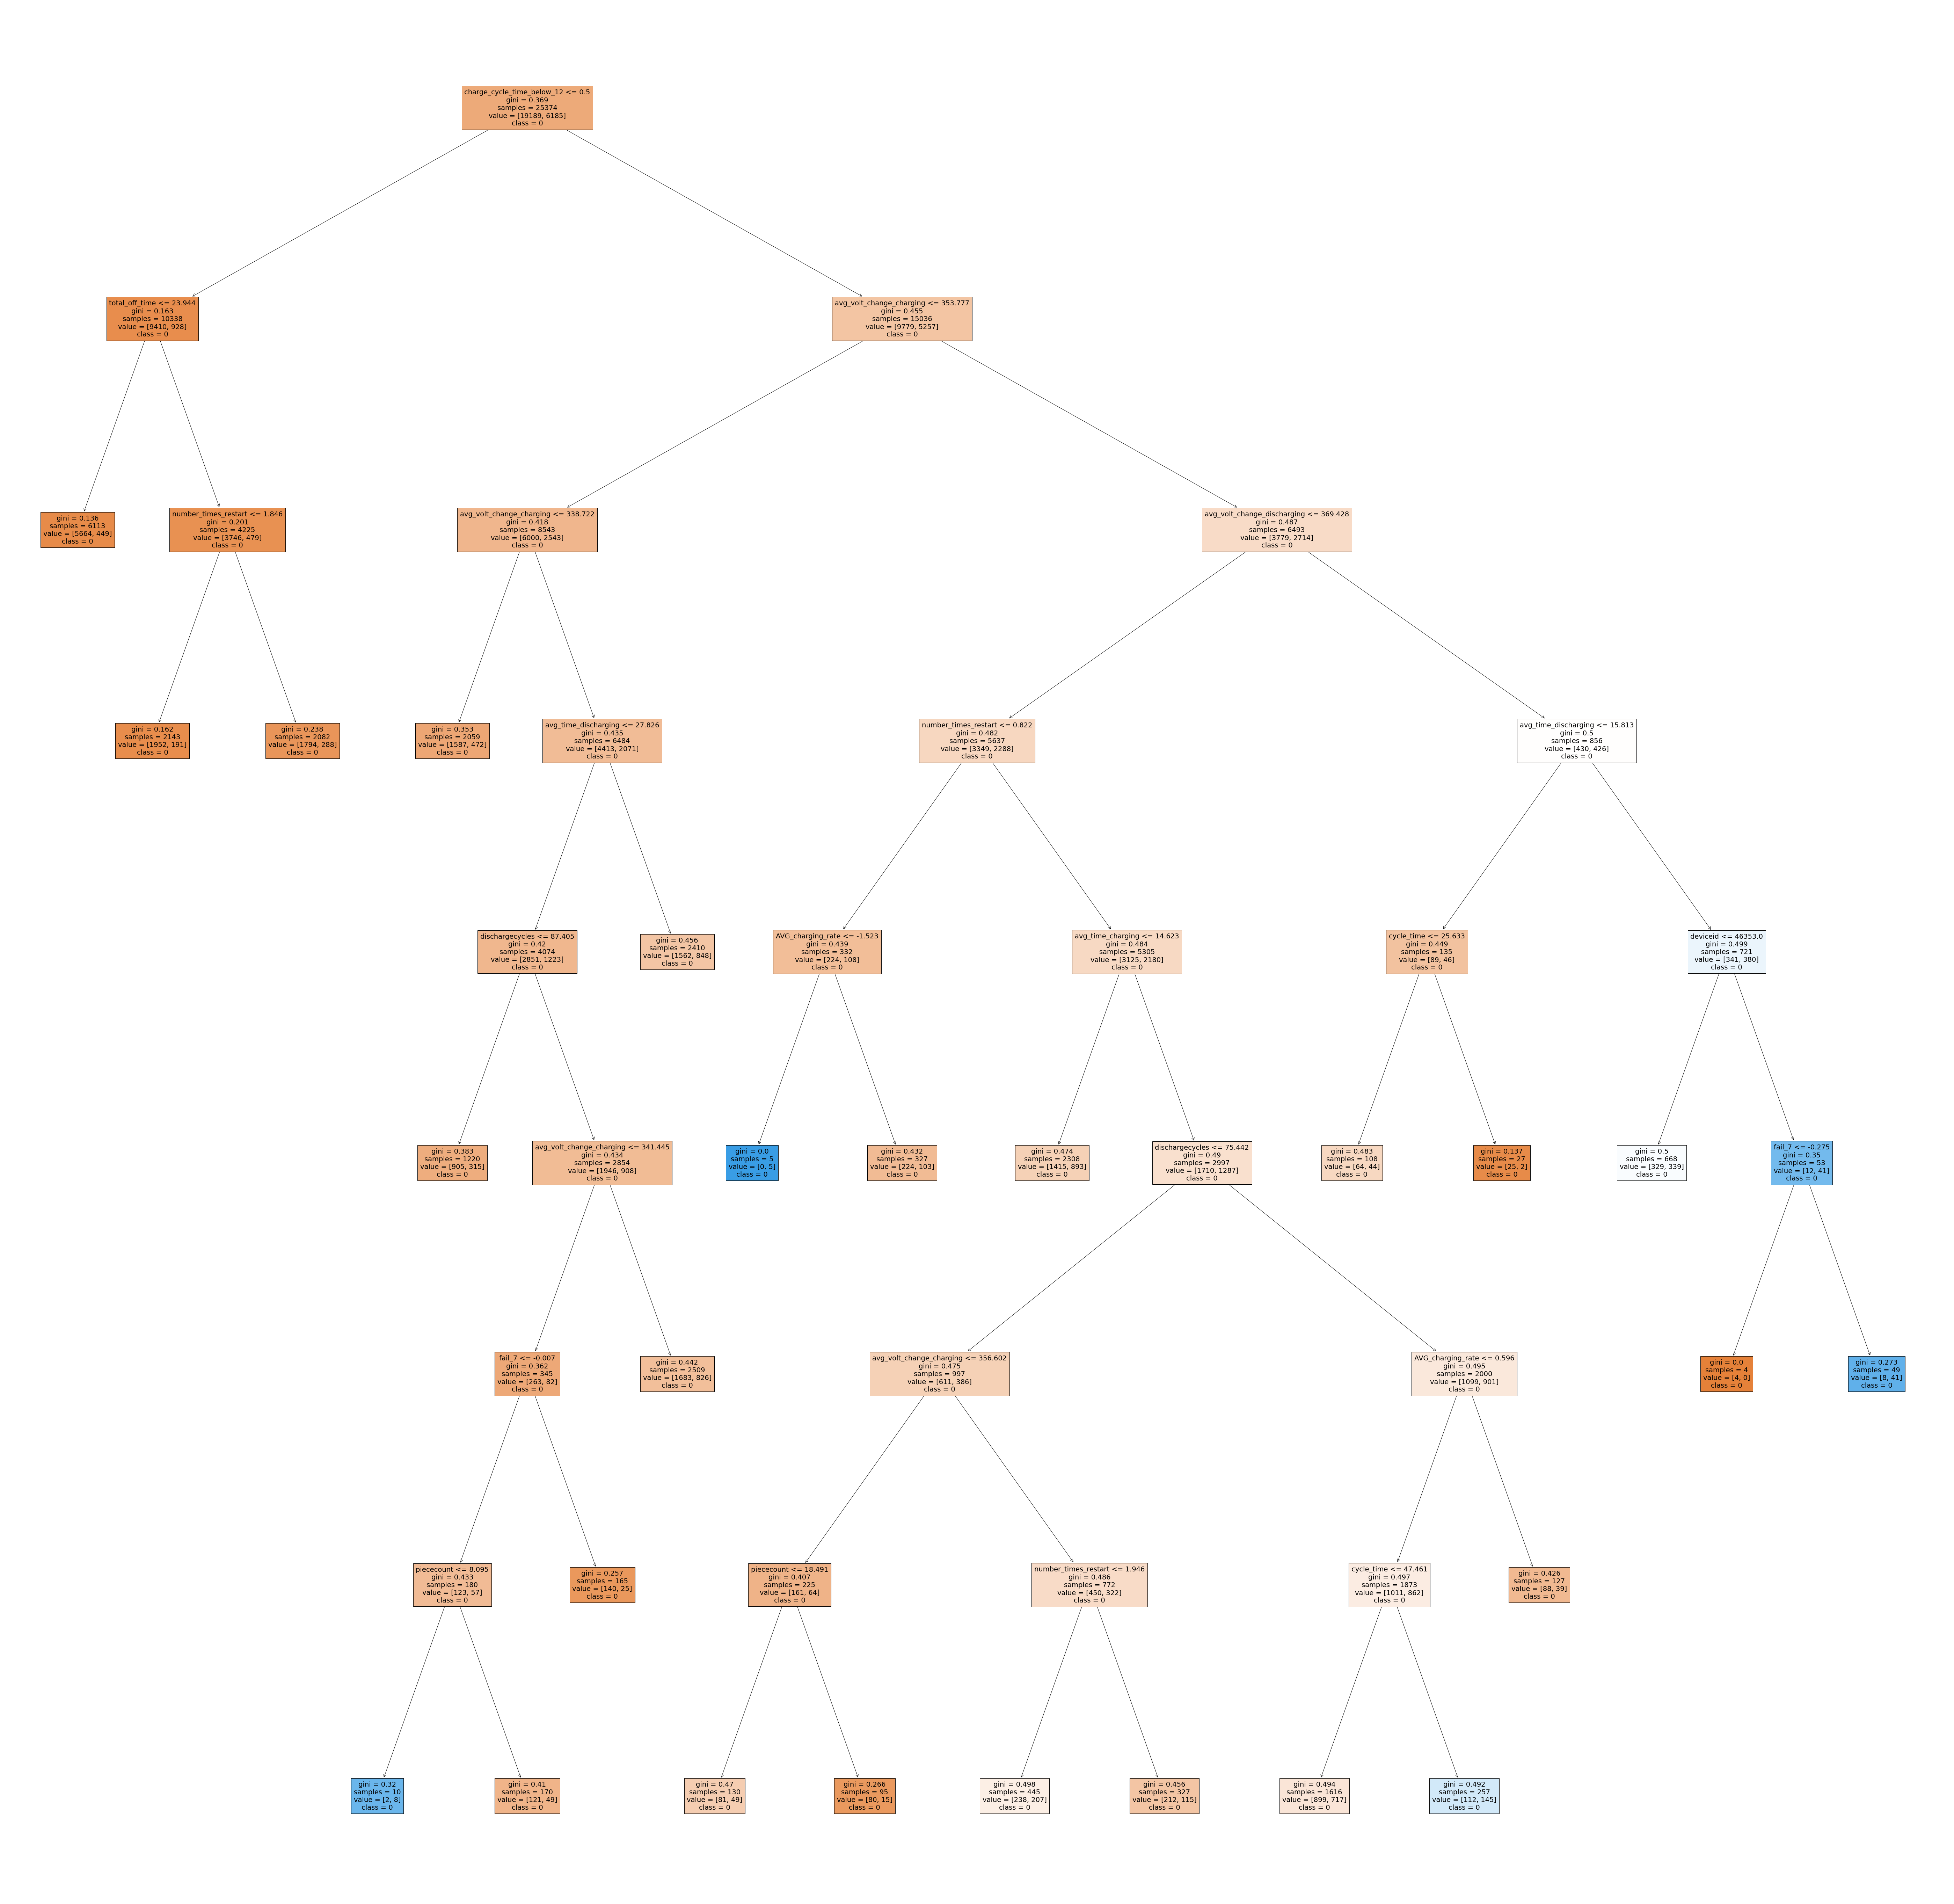

In [41]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(dt_model,
                  feature_names = df.columns,
                  class_names=df.fail_7.astype('str'), filled = True)

#np.unique(y).astype('str')

In [8]:
dt_model.score(X_train, y_train)

1.0

In [9]:
dt_model.score(X_test, y_test)

0.6613856703712462

In [10]:
#np.set_printoptions(threshold=np.inf)
dt_model.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [11]:
y_pred = dt_model.predict(X_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[4911, 1501],
       [1363,  683]])

In [13]:
#df_y is 2 column dataframe of responses from test.
df_y = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})

#df_compare is df to pull all observations where prediction is correct 
df_correct = df_y.loc[df_y.y_pred == df_y.y_test]

#the 3 observations where the prediction was fail and correct 
df_correct.loc[df_y.y_test == 1]

,y_pred,y_test
18286,1,1
2267,1,1
8679,1,1
30594,1,1
4810,1,1
...,...,...
16409,1,1
4314,1,1
864,1,1
26230,1,1


In [21]:
dt_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 12)

In [22]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=12)

In [23]:
dt_model.score(X_train, y_train)

0.7596752581382518

In [24]:
dt_model.score(X_test, y_test)

0.7541972097422559

In [25]:
y_pred = dt_model.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[6234,  168],
       [1911,  145]])

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model,
                  feature_names = df.columns,
                  class_names=df.fail_7.astype('str'), filled = True)

#np.unique(y).astype('str')